In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

ModuleNotFoundError: No module named 'ipywidgets'

## Standard Normal: The Basics ###

Though we have accepted the formula for the standard normal density function since Data 8, we have never proved that it is indeed a density – that it integrates to 1. We have also not checked that its expectation exists, nor that its SD is 1. 

It's time to do all that and thereby ensure that our calculations involving normal densities are legitimate. 

We will start by recalling some facts about the apparently unrelated Rayleigh distribution, which we encountered as the distribution of the [square root of an exponential variable](http://prob140.org/textbook/content/Chapter_16/02_Monotone_Functions.html#applying-the-formula).

Let $T$ have the exponential $(1/2)$ distribution. Then that $V = \sqrt{T}$ has the Rayleigh distribution, with density given by

$$
f_V(v) = ve^{-\frac{1}{2}v^2}, ~~~~ v > 0
$$

and cdf given by

$$
F_V(v) = 1 - e^{-\frac{1}{2}v^2}, ~~~~ v > 0
$$

In fact there is a family of Rayleigh distributions, each of whose members has the distribution of $cV$ for some positive constant $c$. But let us define $V$ to have "the" Rayleigh distribution, and let's see what $V$ has to do with standard normal variables.

In [2]:
# VIDEO: Constant of Integration
from IPython.display import YouTubeVideo

YouTubeVideo('8vLTUrqS67A')

### The Constant of Integration ###
Let $X$ and $Y$ be independent standard normal variables. Since we haven't yet proved that the constant of integration in the standard normal density should be $1/\sqrt{2\pi}$, let's just call it $c$. Then, by independence, the joint density of $X$ and $Y$ is

$$
f(x, y) ~ = ~ c e^{-\frac{1}{2}x^2} \cdot c e^{-\frac{1}{2}y^2} 
~ = ~ c^2 e^{-\frac{1}{2}(x^2 + y^2)},
~~~~ -\infty < x, y < \infty
$$

The joint density at $(x, y)$ is a function of $x^+y^2$. Regardless of the value of the constant $c$, the joint density has *circular symmetry*: if two points on the plane are at the same radial distance from the origin, then the joint density is the same at those two points. Let's make this more clear in our notation.

$$
f(x, y) ~ = ~ c^2 e^{-\frac{1}{2}r^2} ~~~~ \text{where } x^2 + y^2 = r^2
$$

Now let $R = \sqrt{X^2 + Y^2}$. To find the density of $R$, let's try to calculate $P(R \in dr)$. The event is shown in the diagram below.

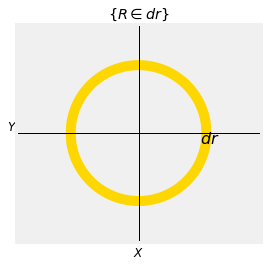

In [4]:
# NO CODE

x = np.append(np.arange(-1, 0.999, 0.01), 1)
y = (1 - x**2)**0.5
plt.axes().set_aspect('equal')
plt.plot(x, y, color='gold', lw=10)
y2 = -1*y
plt.plot(x, y2, color='gold', lw=10)
plt.plot([-1.8, 1.8], [0, 0], color='k', lw=1)
plt.plot([0, 0], [-1.8, 1.8], color='k', lw=1)
plt.xlim(-1.8, 1.8)
plt.ylim(-1.6, 1.6)
plt.xticks([])
plt.yticks([])
plt.text(0.9, -0.15, '$dr$', size=16)
plt.xlabel('$X$')
plt.ylabel('$Y$', rotation=0)
plt.title('$\{R \in dr \}$');

To find the corresponding volume under the joint density surface, two observations will help.

- Because of circular symmetry, the joint density surface is essentially at a constant height over the entire gold ring. The height is $c^2e^{-\frac{1}{2}r^2}$. 
- The area of the ring is essentially that of a rectangle with width $dr$ and length equal to the circumference $2\pi r$.

Hence

$$
P(R \in dr) ~ \sim ~ 2\pi r \cdot dr \cdot c^2e^{-\frac{1}{2}r^2}, ~~~~ r > 0
$$

So the density of $R$ is

$$
f_R(r) ~ = ~ 2\pi c^2 r e^{-\frac{1}{2}r^2}, ~~~~ r > 0
$$

Compare this with the Rayleigh density. The two are exactly the same except that the constants look different. The constant is 1 for the Rayleigh and $2\pi c^2$ for our new $R$. But as both functions are densities, the constants must be equal. Hence $ 1 = 2\pi c^2$, which means

$$
c = \frac{1}{\sqrt{2\pi}}
$$

Now we know that the standard normal density $\phi$ is indeed a density.

$$
\phi(z) ~ = ~ \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2}, ~~~~ -\infty < z < \infty
$$

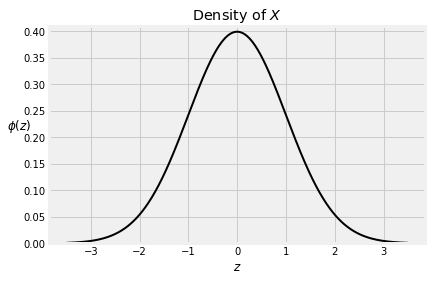

In [3]:
# NO CODE
z = np.arange(-3.5, 3.51, 0.01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, color='k', lw=2)
plt.ylim(0, 0.41)
plt.title('Density of $X$')
plt.xlabel('$z$')
plt.ylabel('$\phi(z)$', rotation=0);

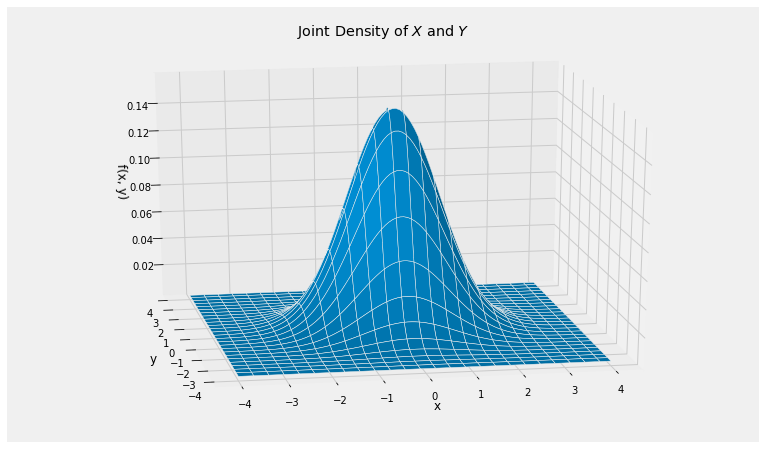

In [5]:
def indep_standard_normals(x,y):
    return 1/(2*math.pi) * np.exp(-0.5*(x**2 + y**2))

Plot_3d((-4, 4), (-4, 4), indep_standard_normals, rstride=4, cstride=4)
plt.title('Joint Density of $X$ and $Y$');

### Expectation ###
If $Z$ is standard normal and $E(Z)$ exists, then $E(Z)$ has to be 0 by symmetry. But you have seen in exercises that not all symmetric distributions have expectations; the Cauchy is an example. To be sure that $E(Z) = 0$ we should first check that $E(\lvert Z \rvert)$ is finite. Let's do that.

$$
\begin{align*}
E(\lvert Z \rvert) &= \int_{-\infty}^\infty \lvert z \rvert \phi(z)dz \\ \\
&= 2 \int_0^\infty z \phi(z)dz ~~~~ \text{(symmetry)} \\ \\
&= \frac{2}{\sqrt{2\pi}} \int_0^\infty z e^{-\frac{1}{2}z^2} dz \\ \\
&= \frac{2}{\sqrt{2\pi}} ~~~~~~ \text{(Rayleigh density integrates to 1)} \\ \\
&= \sqrt{\frac{2}{\pi}}
\end{align*}
$$

Not only have we shown that $E(\lvert Z \rvert)$ is finite and hence $E(Z) = 0$, but we have also found the value of $E(\lvert Z \rvert)$.

### Variance ###
If $X$ and $Y$ are independent standard normal variables, then we have shown that $R = \sqrt{X^2 + Y^2}$ has the Rayleigh distribution. 

You also know that the Rayleigh distribution arises as the distribution of the square root of an exponential $(1/2)$ random variable.

It follows that if $X$ and $Y$ are independent standard normal, then $X^2 + Y^2$ has the exponential $(1/2)$ distribution.

We will study this more closely in a later section. For now, let's make two observations about expectation.

- $X^2 + Y^2$ has the exponential $(1/2)$ distribution, so $E(X^2 + Y^2) = 2$.
- $X$ and $Y$ are identically distributed, so $E(X^2) = E(Y^2)$.

Therefore $E(X^2) = 1$. We know that $E(X) = 0$. So $Var(X) = 1$ and hence $SD(X) = 1$.

In [3]:
# VIDEO: Standard Normal Basics
YouTubeVideo('190dwmZKKPk')